<a href="https://colab.research.google.com/github/iljimae13/Pengelolaan-Citra/blob/main/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 20230403_125208-removebg.png to 20230403_125208-removebg (5).png


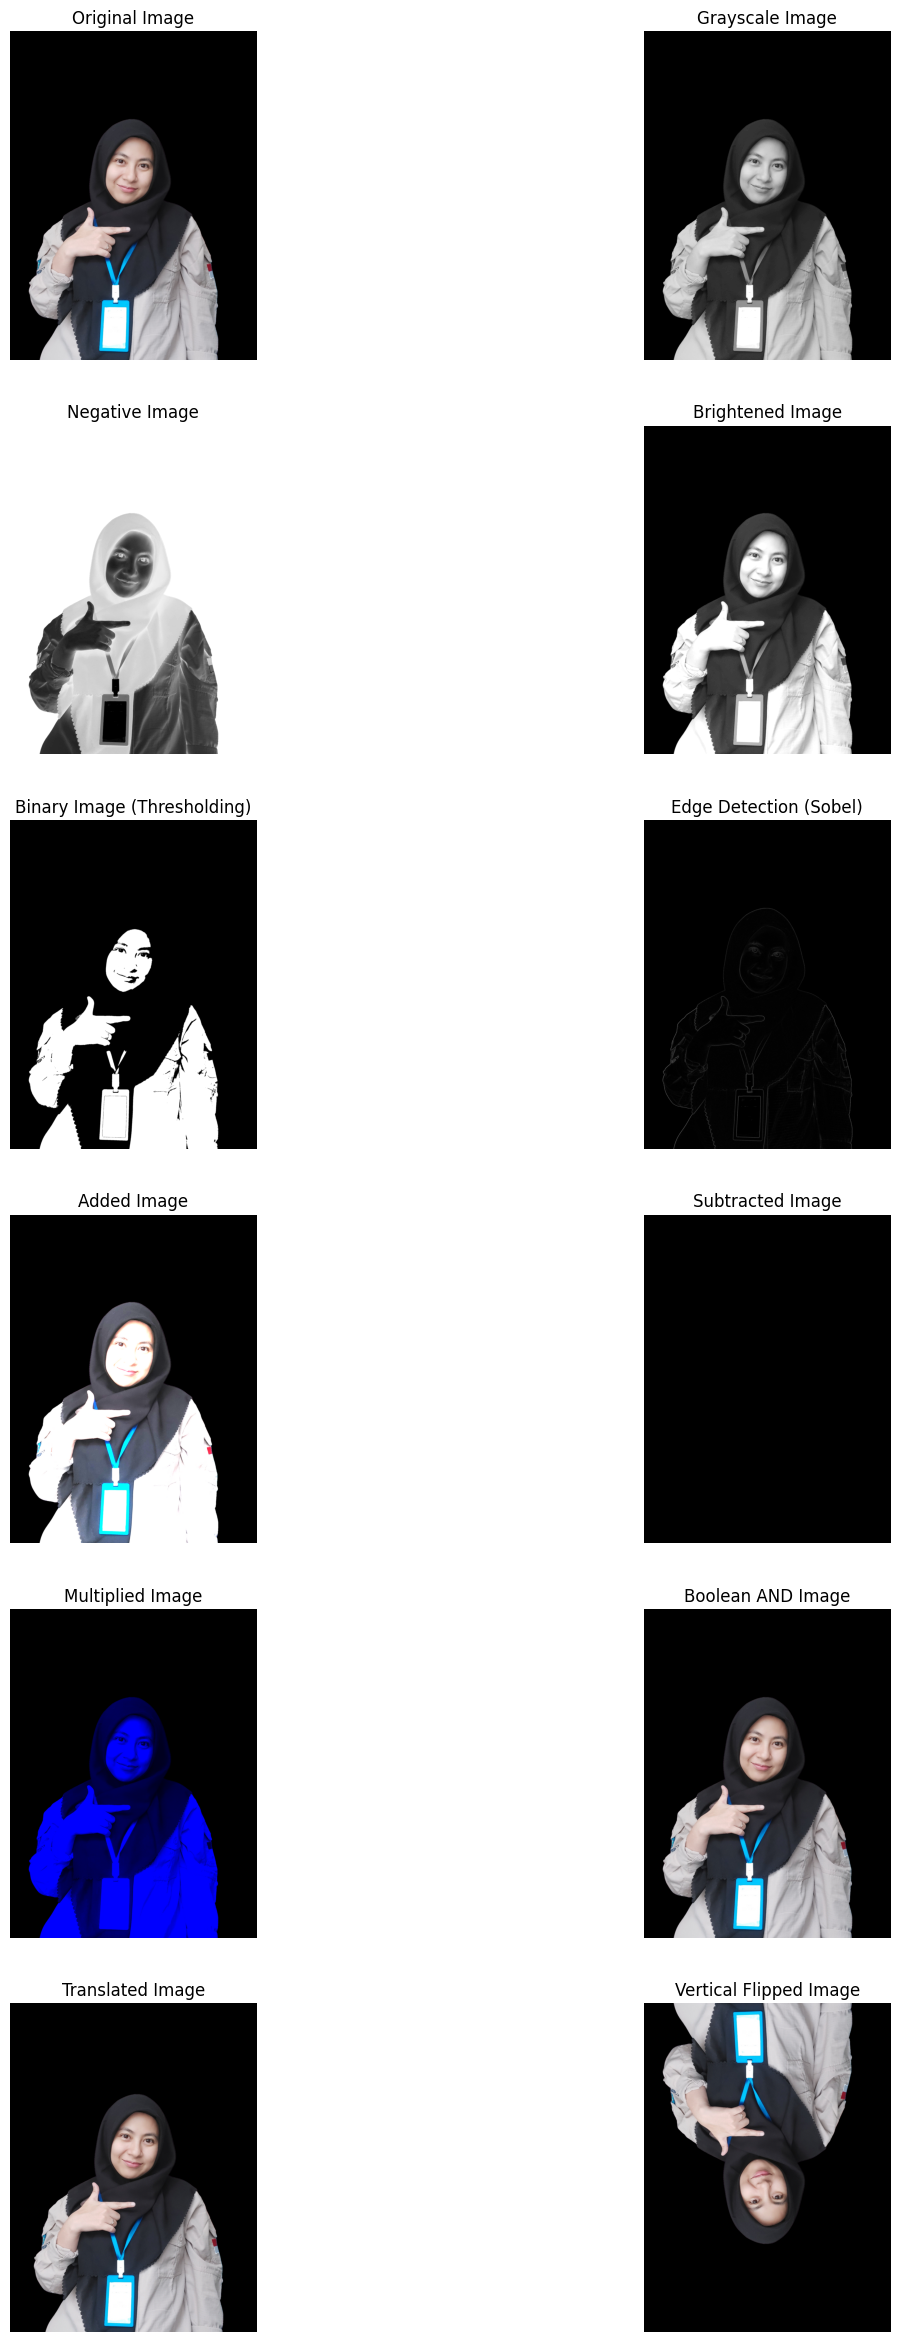

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from your local machine
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
file_name = list(uploaded.keys())[0]
image = cv2.imread(file_name)

# Convert the image from BGR to RGB (for displaying with matplotlib)
# OpenCV loads images in BGR format by default, while matplotlib uses RGB format.
if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
else:
    raise ValueError("Image could not be loaded. Please check the file format and try again.")

# 1. Convert to Grayscale
# Convert the original image to grayscale. Grayscale images have only one channel, making processing easier.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Create a Negative Image
# Create a negative of the grayscale image by subtracting each pixel value from 255.
# This operation inverts the colors, making bright areas dark and vice versa.
negative_image = 255 - gray_image

# 3. Image Brightening
# Increase the brightness of the grayscale image by adding a constant value (b) to each pixel.
# The cv2.add function automatically handles pixel value overflow.
b = 50  # Brightness increment
bright_image = cv2.add(gray_image, b)

# Clipping values to be in valid range
# Ensure pixel values are between 0 and 255.
bright_image = np.clip(bright_image, 0, 255)

# 4. Thresholding (Binarization)
# Convert the grayscale image to a binary image using a threshold value (T).
# Pixels greater than T are set to 255 (white), and others are set to 0 (black).
T = 128  # Threshold value
_, binary_image = cv2.threshold(gray_image, T, 255, cv2.THRESH_BINARY)

# 5. Edge Detection using Sobel (Local Operation)
# Apply the Sobel operator to detect edges in the x and y directions.
# sobel_x detects vertical edges, and sobel_y detects horizontal edges.
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in x direction
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in y direction
# Combine the x and y gradients to get the final edge magnitude.
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 6. Image Addition
# Adding two images by adding the pixel values.
# For demonstration, adding the original image to itself.
added_image = cv2.add(image, image)

# Convert added image from BGR to RGB for displaying
added_image_rgb = cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB)

# 7. Image Subtraction
# Subtracting the pixel values of the image from itself to create a blank image (for demonstration purposes).
subtracted_image = cv2.subtract(image, image)

# Convert subtracted image from BGR to RGB for displaying
subtracted_image_rgb = cv2.cvtColor(subtracted_image, cv2.COLOR_BGR2RGB)

# 8. Image Multiplication
# Multiply the pixel values of the image by a scalar value to increase intensity.
multiplied_image = cv2.multiply(image, np.array([1.5]))  # Increase intensity by 1.5 times

# Convert multiplied image from BGR to RGB for displaying
multiplied_image_rgb = cv2.cvtColor(multiplied_image, cv2.COLOR_BGR2RGB)

# 9. Boolean Operation (AND)
# Perform a bitwise AND operation on the image with itself (no change expected).
boolean_and_image = cv2.bitwise_and(image, image)

# Convert boolean AND image from BGR to RGB for displaying
boolean_and_image_rgb = cv2.cvtColor(boolean_and_image, cv2.COLOR_BGR2RGB)

# 10. Geometric Operation (Translation)
# Translate the image by shifting it 50 pixels to the right and 30 pixels down.
rows, cols = image.shape[:2]
translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# Convert translated image from BGR to RGB for displaying
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

# 11. Geometric Operation (Vertical Flip)
# Flip the image vertically (along the x-axis).
vertical_flip_image = cv2.flip(image, 0)

# Convert vertical flipped image from BGR to RGB for displaying
vertical_flip_image_rgb = cv2.cvtColor(vertical_flip_image, cv2.COLOR_BGR2RGB)

# Display all images
plt.figure(figsize=(15, 35))

plt.subplot(7, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(7, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(7, 2, 3)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(7, 2, 4)
plt.imshow(bright_image, cmap='gray')
plt.title('Brightened Image')
plt.axis('off')

plt.subplot(7, 2, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Thresholding)')
plt.axis('off')

plt.subplot(7, 2, 6)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')

plt.subplot(7, 2, 7)
plt.imshow(added_image_rgb)
plt.title('Added Image')
plt.axis('off')

plt.subplot(7, 2, 8)
plt.imshow(subtracted_image_rgb)
plt.title('Subtracted Image')
plt.axis('off')

plt.subplot(7, 2, 9)
plt.imshow(multiplied_image_rgb)
plt.title('Multiplied Image')
plt.axis('off')

plt.subplot(7, 2, 10)
plt.imshow(boolean_and_image_rgb)
plt.title('Boolean AND Image')
plt.axis('off')

plt.subplot(7, 2, 11)
plt.imshow(translated_image_rgb)
plt.title('Translated Image')
plt.axis('off')

plt.subplot(7, 2, 12)
plt.imshow(vertical_flip_image_rgb)
plt.title('Vertical Flipped Image')
plt.axis('off')

plt.show()
